In [1]:
!pip3 install torch torchvision torchaudio

## 1. 파이토치로 구현하는 ANN
### 텐서의 차원 다루기

In [3]:
import torch

x = torch.tensor([[1,2,3], [4,5,6], [7,8,9]])
print(x)
print("Size:", x.size())
print("Shape:", x.shape)
print("랭크(차원):", x.ndimension())

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
Size: torch.Size([3, 3])
Shape: torch.Size([3, 3])
랭크(차원): 2


In [4]:
# 랭크 늘리기
x = torch.unsqueeze(x, 0) # 0번째 자리 차원 추가하여 [1,3,3]의 랭크 3 텐서로
print(x)
print("Size:", x.size())
print("Shape:", x.shape)
print("랭크(차원):", x.ndimension())

tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])
Size: torch.Size([1, 3, 3])
Shape: torch.Size([1, 3, 3])
랭크(차원): 3


In [5]:
# 랭크 줄이기
x = torch.squeeze(x)
print(x)
print("Size:", x.size())
print("Shape:", x.shape) #[3, 3] 2개의 차원에 각 3개의 원소를 가진 텐서
print("랭크(차원):", x.ndimension())

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
Size: torch.Size([3, 3])
Shape: torch.Size([3, 3])
랭크(차원): 2


In [6]:
# 랭크의 형태 바꾸기 - 랭크 2의 [3,3] 모양을 랭크 1의 [9]로 변경
x = x.view(9)
print(x)
print("Size:", x.size())
print("Shape:", x.shape)
print("랭크(차원):", x.ndimension())

tensor([1, 2, 3, 4, 5, 6, 7, 8, 9])
Size: torch.Size([9])
Shape: torch.Size([9])
랭크(차원): 1


In [7]:
try:
    x = x.view(2,4) # 2*4 = 8 로 원소개수가 달라서 에러남
except Exception as e:
    print(e) #에러 출력

shape '[2, 4]' is invalid for input of size 9


### 텐서를 이용한 연산과 행렬 곱

In [1]:
import torch
# 행렬곱을 위한 w,x 추가
w = torch.randn(5,3, dtype=torch.float) # 5*3 행렬
x = torch.tensor([[1.0,2.0], [3.0,4.0], [5.0,6.0]])
print("w size:", w.size())
print("x size:", x.size())
print("w:", w)
print("x:", x)

w size: torch.Size([5, 3])
x size: torch.Size([3, 2])
w: tensor([[ 0.2541,  0.9576, -0.1518],
        [-1.0312, -0.8963,  0.2418],
        [-0.1794,  0.6307,  0.2132],
        [ 0.1207,  0.9382,  0.6917],
        [ 0.0073, -1.3080, -0.5610]])
x: tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])


In [2]:
b = torch.randn(5,2, dtype=torch.float) # 다른 행렬 연산에 쓰일 b도 추가
print("b:", b.size())
print("b:", b)

b: torch.Size([5, 2])
b: tensor([[-7.4901e-01,  2.3330e+00],
        [-1.7285e-03, -8.4138e-01],
        [-7.5503e-01,  1.4450e-01],
        [ 4.9658e-01, -8.3157e-01],
        [-6.4871e-02, -7.7489e-01]])


In [3]:
# 행렬곱 실행
wx = torch.mm(w,x) # w의 행은 5, x의 열은 2, 즉 shape는 [5, 2]입니다.
print("wx size:", wx.size())
print("wx:", wx)

wx size: torch.Size([5, 2])
wx: tensor([[ 2.3678,  3.4276],
        [-2.5112, -4.1969],
        [ 2.7784,  3.4429],
        [ 6.3936,  8.1442],
        [-6.7218, -8.5835]])


In [4]:
# wx행렬에 b행렬 더하기
result = wx + b	
print("result size:", result.size()) 
print("result:", result) 

result size: torch.Size([5, 2])
result: tensor([[ 1.6188,  5.7606],
        [-2.5130, -5.0383],
        [ 2.0234,  3.5874],
        [ 6.8902,  7.3126],
        [-6.7867, -9.3584]])


### Autograd - 파이토치의 미분계산 자동화 기능(경사하강법)

In [5]:
import torch
# requires_grad가 True이면 w에 대한 미분값을 w.grad에 저장
w = torch.tensor(1.0, requires_grad=True)

In [6]:
a = w*3
l = a**2 # l = (3w)^2
l.backward() # l을 w에 대해 미분
print(w.grad)
print('l을 w로 미분한 값은 {}'.format(w.grad))

tensor(18.)
l을 w로 미분한 값은 18.0


### 경사하강법으로 이미지 복원하기
- 오염된 이미지의 원본을 복원
- 파이토치의 최적화 알고리즘 배제하고, 직접 최적화 구현
- 주어진 weird_function() 함수에 버그가 있어서 라고 가정

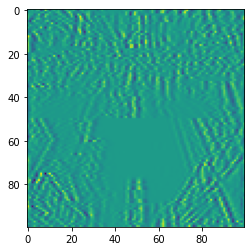

In [7]:
import torch
import pickle
import matplotlib.pyplot as plt

shp_original_img = (100, 100)
broken_image =  torch.FloatTensor( pickle.load(open('./broken_image_t.p', 'rb'),encoding='latin1' ) )
plt.imshow(broken_image.view(100,100)) 

In [8]:
# 주어진 값
def weird_function(x, n_iter=5):
    h = x    
    filt = torch.tensor([-1./3, 1./3, -1./3])
    for i in range(n_iter):
        zero_tensor = torch.tensor([1.0*0])
        h_l = torch.cat( (zero_tensor, h[:-1]), 0)
        h_r = torch.cat((h[1:], zero_tensor), 0 )
        h = filt[0] * h + filt[2] * h_l + filt[1] * h_r
        if i % 2 == 0:
            h = torch.cat( (h[h.shape[0]//2:],h[:h.shape[0]//2]), 0  )
    return h

In [9]:
def distance_loss(hypothesis, broken_image):    
    return torch.dist(hypothesis, broken_image) # 거리를 오찻값으로 설정

In [10]:
random_tensor = torch.randn(10000, dtype = torch.float)
# 랜덤 텐서를 생성하여 원본 이미지와 이 랜덤텐서를 weird_function에 넣은 이미지를 비교하여
# 같다면 원본도 같을 것이라는 가정
# 결론적으로 원본 텐서와 랜덤 텐서의 오차가 최소화되도록 랜덤 텐서를 변경해주는게 목표!

In [11]:
lr = 0.8
for i in range(0,20000):
    random_tensor.requires_grad_(True)
    hypothesis = weird_function(random_tensor)
    loss = distance_loss(hypothesis, broken_image)
    loss.backward()
    with torch.no_grad(): # 파이토치의 자동기울기 계산 비활성화
        random_tensor = random_tensor - lr*random_tensor.grad
    if i % 1000 == 0:
        print('Loss at {} = {}'.format(i, loss.item()))

Loss at 0 = 12.182931900024414
Loss at 1000 = 1.1284418106079102
Loss at 2000 = 0.5560605525970459
Loss at 3000 = 0.38685616850852966
Loss at 4000 = 0.30375733971595764
Loss at 5000 = 0.252149760723114
Loss at 6000 = 0.2154066115617752
Loss at 7000 = 0.18676453828811646
Loss at 8000 = 0.16289375722408295
Loss at 9000 = 0.1420014351606369
Loss at 10000 = 0.1230689212679863
Loss at 11000 = 0.10548684746026993
Loss at 12000 = 0.08887118846178055
Loss at 13000 = 0.0729692280292511
Loss at 14000 = 0.057609375566244125
Loss at 15000 = 0.04267313331365585
Loss at 16000 = 0.028079407289624214
Loss at 17000 = 0.021155111491680145
Loss at 18000 = 0.021165629848837852
Loss at 19000 = 0.021167263388633728


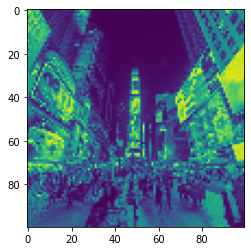

In [12]:
plt.imshow(random_tensor.view(100,100).data) # 복원 이미지 확인

### 신경망 모델 구현하기

In [13]:
import torch
import numpy
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

C:\Users\autot\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [14]:
n_dim = 2
x_train, y_train = make_blobs(n_samples=80, n_features=n_dim, centers=[[1,1],[-1,-1],[1,-1],[-1,1]], shuffle=True, cluster_std=0.3)
x_test, y_test = make_blobs(n_samples=20, n_features=n_dim, centers=[[1,1],[-1,-1],[1,-1],[-1,1]], shuffle=True, cluster_std=0.3)

In [16]:
def label_map(y_, from_, to_):
    y = numpy.copy(y_)
    for f in from_:
        y[y_ == f] = to_
    return y

y_train = label_map(y_train, [0, 1], 0) # 0,1 레이블을 0 레이블로 통합
y_train = label_map(y_train, [2, 3], 1) # 2,3 레이블을 1 레이블로 통합
y_test = label_map(y_test, [0, 1], 0)
y_test = label_map(y_test, [2, 3], 1)

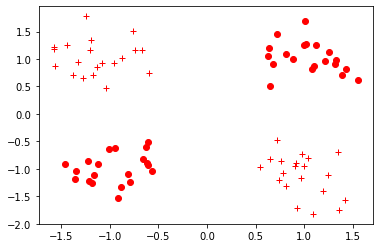

In [17]:
def vis_data(x,y = None, c = 'r'):
    if y is None:
        y = [None] * len(x)
    for x_, y_ in zip(x,y):
        if y_ is None:
            plt.plot(x_[0], x_[1], '*',markerfacecolor='none', markeredgecolor=c)
        else:
            plt.plot(x_[0], x_[1], c+'o' if y_ == 0 else c+'+')

plt.figure()
vis_data(x_train, y_train, c='r')
plt.show()

In [18]:
# numpy 벡터를 파이토치 텐서로 변경
x_train = torch.FloatTensor(x_train)
print(x_train.shape) # 80,2 텐서인 것 확인
x_test = torch.FloatTensor(x_test)
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)

torch.Size([80, 2])


In [19]:
class NeuralNet(torch.nn.Module): # torch.nn.Module을 상속
    def __init__(self, input_size, hidden_size):
        super(NeuralNet, self).__init__()
        self.input_size = input_size
        self.hidden_size  = hidden_size
        self.linear_1 = torch.nn.Linear(self.input_size, self.hidden_size) # [1, hidden_size] 텐서 반환
        self.relu = torch.nn.ReLU()
        self.linear_2 = torch.nn.Linear(self.hidden_size, 1)
        self.sigmoid = torch.nn.Sigmoid()

    def forward(self, input_tensor):
        linear1 = self.linear_1(input_tensor)
        relu = self.relu(linear1)
        linear2 = self.linear_2(relu)
        output = self.sigmoid(linear2) # activation function
        return output

In [20]:
model = NeuralNet(2, 5) #input_size : 2, hidden_size : 5
learning_rate = 0.03
criterion = torch.nn.BCELoss() #binary_cross_entropy
epochs = 2000
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [21]:
# 학습 전 모델 성능 평가
model.eval() # 평가모드로 변경
test_loss_before = criterion(model(x_test).squeeze(), y_test)
print('Before Training, test loss is {}'.format(test_loss_before.item()))

Before Training, test loss is 0.7382365465164185


In [22]:
# 신경망 학습
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    train_output = model(x_train)
    train_loss = criterion(train_output.squeeze(), y_train)
    if epoch % 100 == 0:
        print('Train loss at {} is {}'.format(epoch, train_loss.item()))
    train_loss.backward()
    optimizer.step()

Train loss at 0 is 0.7570303082466125
Train loss at 100 is 0.6168882250785828
Train loss at 200 is 0.4944930970668793
Train loss at 300 is 0.3647509217262268
Train loss at 400 is 0.2491690218448639
Train loss at 500 is 0.1669696867465973
Train loss at 600 is 0.11649219691753387
Train loss at 700 is 0.08591848611831665
Train loss at 800 is 0.06643836200237274
Train loss at 900 is 0.05336307734251022
Train loss at 1000 is 0.04415047541260719
Train loss at 1100 is 0.03738199546933174
Train loss at 1200 is 0.032240718603134155
Train loss at 1300 is 0.028223568573594093
Train loss at 1400 is 0.025013621896505356
Train loss at 1500 is 0.022399673238396645
Train loss at 1600 is 0.020236428827047348
Train loss at 1700 is 0.018421102315187454
Train loss at 1800 is 0.01687917858362198
Train loss at 1900 is 0.015555468387901783


In [23]:
# 학습 후 모델 성능 평가
model.eval() # 모델을 평가모드로 변경
test_loss = criterion(torch.squeeze(model(x_test)), y_test)
print('After Training, test loss is {}'.format(test_loss.item()))

After Training, test loss is 0.02056335285305977


In [24]:
# 학습된 가중치 저장
torch.save(model.state_dict(), './model.pt') 
# 모델 내 가중치들이 딕셔너리 형태로 표현된 데이터(연산이름: 가중치 or 편향)
print('state_dict format of the model: {}'.format(model.state_dict()))

state_dict format of the model: OrderedDict([('linear_1.weight', tensor([[ 1.2988,  1.2399],
        [-0.9195, -0.9954],
        [-1.1048, -1.1751],
        [-1.5850,  1.3402],
        [ 1.4980, -1.6885]])), ('linear_1.bias', tensor([ 0.1000,  0.0606, -0.0154, -0.0343, -0.1003])), ('linear_2.weight', tensor([[-1.7352, -1.1437, -1.3976,  2.0831,  2.0941]])), ('linear_2.bias', tensor([-0.5630]))])


In [25]:
# 저장된 가중치 불러와 새로운 모델에 적용(전이학습)
new_model = NeuralNet(2, 5)
new_model.load_state_dict(torch.load('./model.pt'))
new_model.eval()
print('벡터 [-1, 1]이 레이블 1을 가질 확률은 {}'.format(new_model(torch.FloatTensor([-1,1])).item()))

벡터 [-1, 1]이 레이블 1을 가질 확률은 0.9954482913017273
